# Statsmodels Time Series Excercises
For this set of exercises we're using data from the Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989.

Data source: https://fred.stlouisfed.org/series/IPG2211A2N

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [2]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('Data/EnergyProduction.csv',index_col=0,parse_dates=True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [3]:
df.count()

EnergyIndex    240
dtype: int64

In [4]:
df.dropna()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321
...,...
1989-08-01,75.2704
1989-09-01,69.5107
1989-10-01,66.0620


In [5]:
df.count()

EnergyIndex    240
dtype: int64

### 1. Assign a frequency of 'MS' to the DatetimeIndex.

In [6]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

In [7]:
# CODE HERE
df.index.freq = 'MS'

### 2. Plot the dataset.

<Axes: xlabel='DATE'>

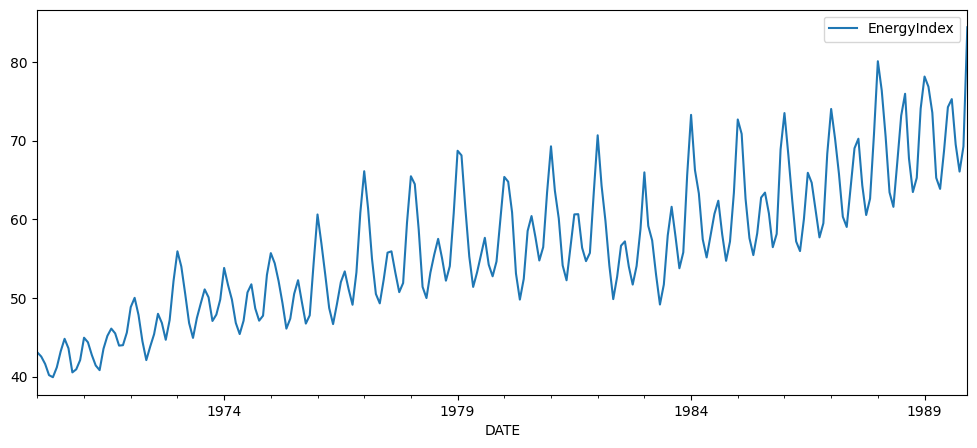

In [8]:
# CODE HERE
df.plot(figsize=(12,5))

### 3. Add a column that shows a 12-month Simple Moving Average (SMA).<br>&nbsp;&nbsp;&nbsp;&nbsp;Plot the result.

In [9]:
df['SMA 12'] = df['EnergyIndex'].rolling(window=12).mean()


<Axes: xlabel='DATE'>

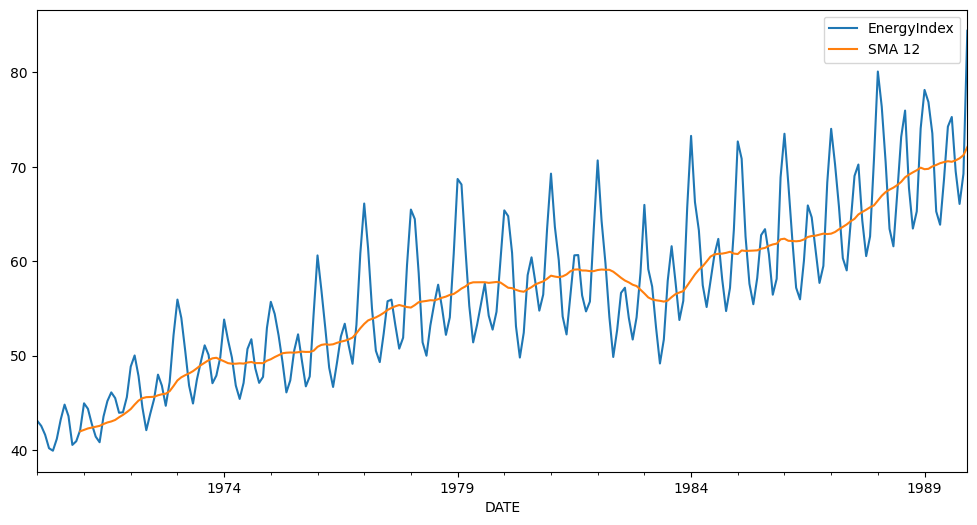

In [10]:
df.plot(figsize=(12,6))

### 4. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels <tt>SimpleExpSmoothing</tt> function. Plot the result.

In [11]:
# DON'T FORGET TO PERFORM THE IMPORT!
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12
alpha = 2/(span + 1)

df['SES 12'] = SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=2/(12+1),
                                                         optimized=False).fittedvalues.shift(-1)
# df['EWMA 12']= df['EnergyIndex'].ewm(alpha=alpha,adjust=False).mean()

<Axes: xlabel='DATE'>

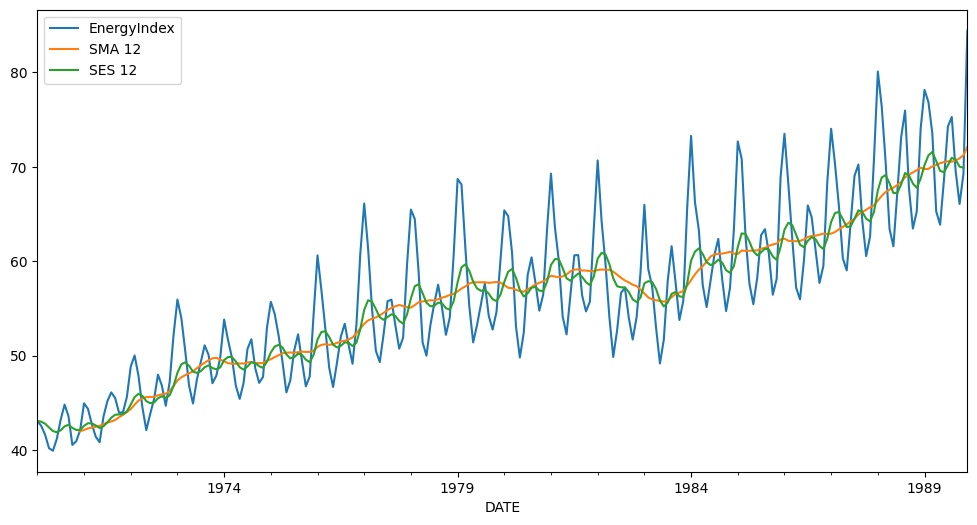

In [12]:
df.plot(figsize=(12,6))

### 5. Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

In [13]:
# DON'T FORGET TO PERFORM THE IMPORT!
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['TES_mul_12'] = ExponentialSmoothing(df['EnergyIndex'],
                                        trend ='mul',
                                        seasonal='mul',
                                        seasonal_periods = 12).fit().fittedvalues

In [14]:
df.head()

,EnergyIndex,SMA 12,SES 12,TES_mul_12
DATE,,,,
1970-01-01,43.0869,NaN,43.086900,43.086872
1970-02-01,42.5577,NaN,43.005485,41.068157
1970-03-01,41.6215,NaN,42.792564,39.724743
1970-04-01,40.1982,NaN,42.393431,37.961978
1970-05-01,39.9321,NaN,42.014765,38.600729


<Axes: xlabel='DATE'>

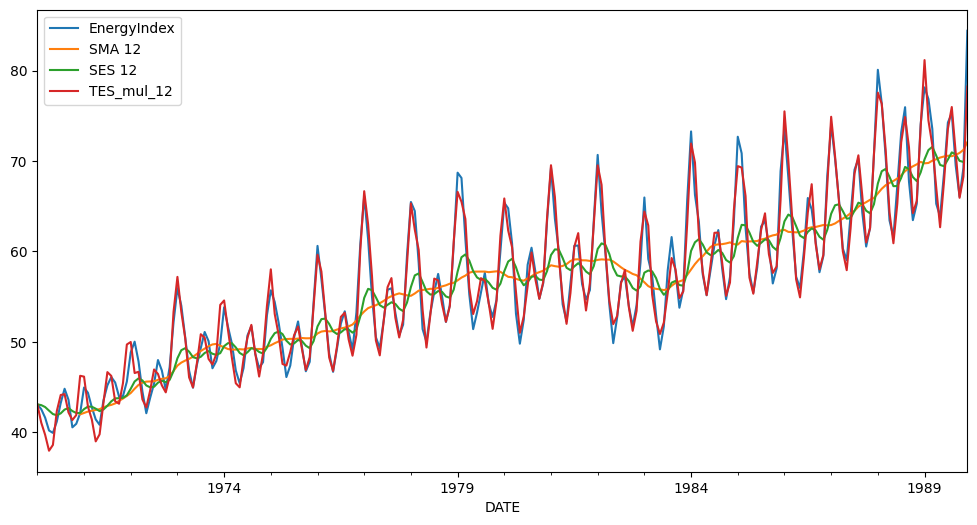

In [15]:
df.plot(figsize=(12,6))

### OPTIONAL: Plot the same  as above, but for only the first two years.

In [16]:
df.columns

Index(['EnergyIndex', 'SMA 12', 'SES 12', 'TES_mul_12'], dtype='object')

<Axes: xlabel='DATE'>

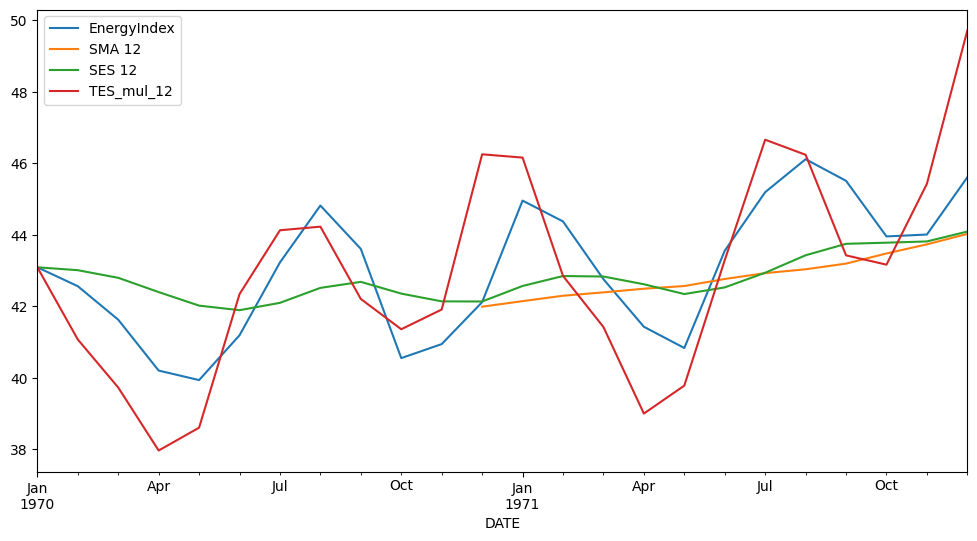

In [17]:
df[['EnergyIndex', 'SMA 12', 'SES 12', 'TES_mul_12']].iloc[:24].plot(figsize=(12,6))

<Axes: xlabel='DATE'>

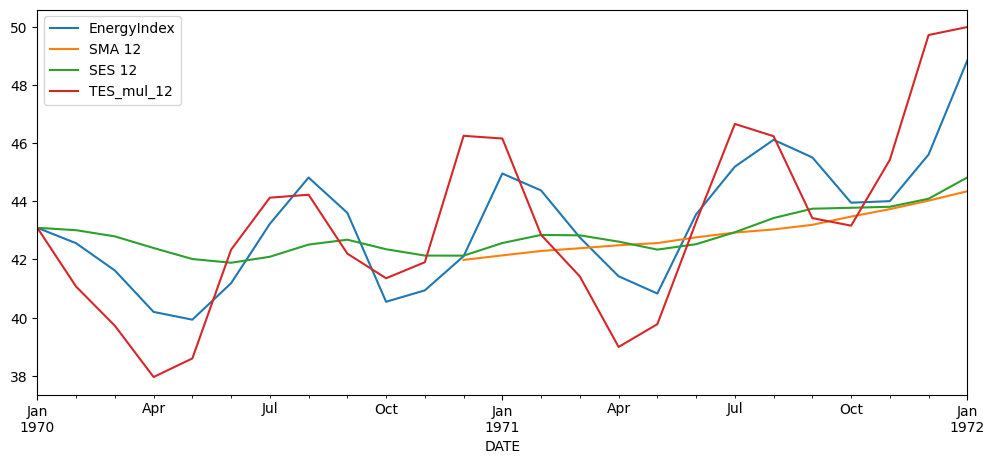

In [18]:
df[:'1972-01-01'].plot(figsize=(12,5))

### BONUS QUESTION: There is a visible decline in the Industrial Production Index around 1982-1983.<br>Why do you think this might be?

<Axes: xlabel='DATE'>

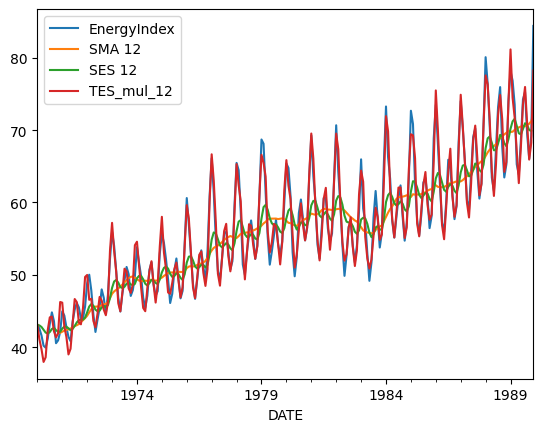

In [19]:
df.plot()

<Axes: xlabel='DATE'>

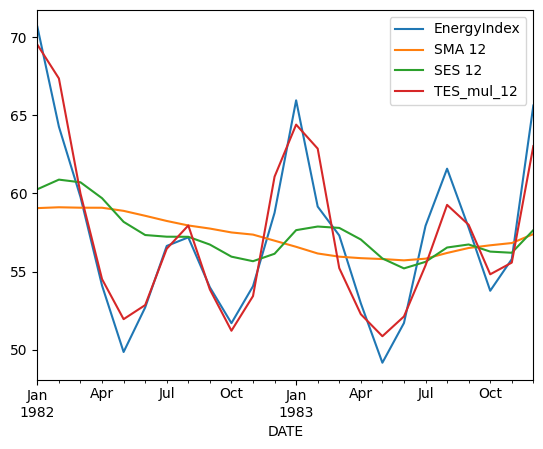

In [20]:
df[['EnergyIndex', 'SMA 12', 'SES 12', 'TES_mul_12']]['1982-01-01':'1983-12-31'].plot()

<Axes: xlabel='DATE'>

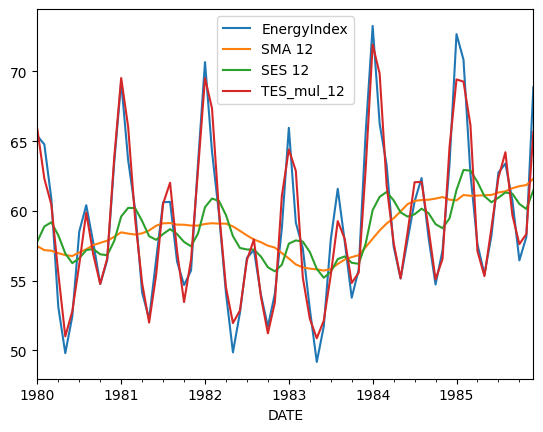

In [21]:
df[['EnergyIndex', 'SMA 12', 'SES 12', 'TES_mul_12']]['1980-01-01':'1985-12-31'].plot()

In [22]:
# The United States suffered a significant economic recession at that time.